In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Data\SCMS_Delivery_History_Dataset.csv")

In [3]:
df.head(3)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,C?e d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.0,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.2,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,C?e d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.0,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN


In [4]:
df.shape

(10324, 33)

In [5]:
df.isnull().sum()[df.isnull().sum() > 0]

Shipment Mode                 360
Dosage                       1736
Line Item Insurance (USD)     287
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [8]:
df.nunique()

ID                              10324
Project Code                      142
PQ #                             1237
PO / SO #                        6233
ASN/DN #                         7030
Country                            43
Managed By                          4
Fulfill Via                         2
Vendor INCO Term                    8
Shipment Mode                       4
PQ First Sent to Client Date      765
PO Sent to Vendor Date            897
Scheduled Delivery Date          2006
Delivered to Client Date         2093
Delivery Recorded Date           2042
Product Group                       5
Sub Classification                  6
Vendor                             73
Item Description                  184
Molecule/Test Type                 86
Brand                              48
Dosage                             54
Dosage Form                        17
Unit of Measure (Per Pack)         31
Line Item Quantity               5065
Line Item Value                  8741
Pack Price  

In [9]:
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


In [10]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['ID', 'Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price', 'Line Item Insurance (USD)']

We have 26 categorical features : ['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode', 'PQ First Sent to Client Date', 'PO Sent to Vendor Date', 'Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date', 'Product Group', 'Sub Classification', 'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage', 'Dosage Form', 'Manufacturing Site', 'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)']


In [11]:
## Replace nan value with mean
df['Line Item Insurance (USD)'].fillna(df['Line Item Insurance (USD)'].mean(), inplace=True)

In [12]:
## Drop Null values
df.dropna(axis=0, inplace=True)

In [13]:
df.shape

(8279, 33)

In [14]:
df.nunique()

ID                              8279
Project Code                      90
PQ #                             877
PO / SO #                       4827
ASN/DN #                        5320
Country                           34
Managed By                         2
Fulfill Via                        2
Vendor INCO Term                   7
Shipment Mode                      4
PQ First Sent to Client Date     581
PO Sent to Vendor Date           579
Scheduled Delivery Date         1682
Delivered to Client Date        1796
Delivery Recorded Date          1729
Product Group                      3
Sub Classification                 4
Vendor                            42
Item Description                 138
Molecule/Test Type                42
Brand                             25
Dosage                            54
Dosage Form                       15
Unit of Measure (Per Pack)        21
Line Item Quantity              4537
Line Item Value                 7512
Pack Price                      1067
U

In [15]:
# Clean 'Weight (Kilograms)', 'Freight Cost (USD)' columns
import re
columns_to_clean = ['Weight (Kilograms)', 'Freight Cost (USD)']


In [16]:
# Define regular expression patterns for valid numerical values
pattern = r'^[-+]?\d*\.?\d+$'

In [17]:
# Iterate over the columns and clean the inconsistent values
for column in columns_to_clean:
    df[column] = df[column].apply(lambda x: re.sub(pattern, '', str(x)) if not re.match(pattern, str(x)) else x)

In [18]:
# Convert the columns back to numeric data type
df[columns_to_clean] = df[columns_to_clean].apply(pd.to_numeric, errors='coerce')

In [19]:
df.nunique()

ID                              8279
Project Code                      90
PQ #                             877
PO / SO #                       4827
ASN/DN #                        5320
Country                           34
Managed By                         2
Fulfill Via                        2
Vendor INCO Term                   7
Shipment Mode                      4
PQ First Sent to Client Date     581
PO Sent to Vendor Date           579
Scheduled Delivery Date         1682
Delivered to Client Date        1796
Delivery Recorded Date          1729
Product Group                      3
Sub Classification                 4
Vendor                            42
Item Description                 138
Molecule/Test Type                42
Brand                             25
Dosage                            54
Dosage Form                       15
Unit of Measure (Per Pack)        21
Line Item Quantity              4537
Line Item Value                 7512
Pack Price                      1067
U

In [20]:
df.isnull().sum()[df.isnull().sum() > 0]

Weight (Kilograms)    3466
Freight Cost (USD)    3632
dtype: int64

In [21]:
## fill based on ASN/DN
mean_value1 = df.groupby('ASN/DN #')['Weight (Kilograms)'].transform('mean')
df['Weight (Kilograms)'].fillna(mean_value1, inplace=True)
mean_value2 = df.groupby('ASN/DN #')['Freight Cost (USD)'].transform('mean')
df['Freight Cost (USD)'].fillna(mean_value2, inplace=True)


In [22]:
df.isnull().sum()[df.isnull().sum() > 0]

Weight (Kilograms)    1371
Freight Cost (USD)    1547
dtype: int64

In [23]:
## Replace nan value with mean
df['Line Item Insurance (USD)'].fillna(df['Line Item Insurance (USD)'].mean(), inplace=True)

In [24]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358.0,4521.50,240.117626
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855.0,16007.06,240.117626
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590.0,45450.08,240.117626
5,23,112-NG-T01,Pre-PQ Process,SCMS-87,ASN-57,Nigeria,PMO - US,Direct Drop,EXW,Air,...,240,416,2225.6,5.35,0.02,"Aurobindo Unit III, India",Yes,504.0,5920.42,240.117626
6,44,110-ZM-T01,Pre-PQ Process,SCMS-139,ASN-130,Zambia,PMO - US,Direct Drop,DDU,Air,...,90,135,4374.0,32.40,0.36,MSD South Granville Australia,Yes,328.0,NaN,240.117626


In [25]:
df = df.drop(columns=['ID', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Item Description'], errors='ignore')

In [26]:
df.shape

(8279, 28)

In [27]:
df

,Project Code,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
1,108-VN-T01,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358.0,4521.50,240.117626
3,108-VN-T01,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,01-Sep-06,01-Sep-06,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855.0,16007.06,240.117626
4,108-VN-T01,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590.0,45450.08,240.117626
5,112-NG-T01,Nigeria,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,28-Sep-06,28-Sep-06,...,240,416,2225.60,5.35,0.02,"Aurobindo Unit III, India",Yes,504.0,5920.42,240.117626
6,110-ZM-T01,Zambia,PMO - US,Direct Drop,DDU,Air,Pre-PQ Process,Date Not Captured,08-Jan-07,08-Jan-07,...,90,135,4374.00,32.40,0.36,MSD South Granville Australia,Yes,328.0,NaN,240.117626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,103-ZW-T30,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/14,N/A - From RDC,31-Jul-15,15-Jul-15,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,25880.0,46111.55,705.790000
10320,104-CI-T30,C?e d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,10/24/14,N/A - From RDC,31-Jul-15,06-Aug-15,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,4426.0,14734.92,161.710000
10321,110-ZM-T30,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,08-12-2014,N/A - From RDC,31-Aug-15,25-Aug-15,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,85128.0,NaN,5284.040000
10322,200-ZW-T30,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,07-01-2015,N/A - From RDC,09-Sep-15,04-Aug-15,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392.0,NaN,134.030000


In [28]:
from dateutil.relativedelta import relativedelta
df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'])
df['Delivery Recorded Date'] = pd.to_datetime(df['Delivery Recorded Date'])


In [29]:
df['DayToDeliver'] = df.apply(lambda row: relativedelta(row['Delivery Recorded Date'], row['Scheduled Delivery Date']).days, axis=1)

In [30]:
date_cols = [
    'Scheduled Delivery Date',
    'Delivered to Client Date'
]

In [31]:
# Convert all to datetime
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [32]:
for col in date_cols:
    df[f"{col}_year"] = df[col].dt.year
    df[f"{col}_month"] = df[col].dt.month
    df[f"{col}_day"] = df[col].dt.day
    df[f"{col}_weekday"] = df[col].dt.weekday
    df[f"{col}_is_weekend"] = df[f"{col}_weekday"] >= 5
    df[f"{col}_quarter"] = df[col].dt.quarter
    df[f"{col}_weekofyear"] = df[col].dt.isocalendar().week
    df[f"{col}_days_since"] = (pd.Timestamp.now() - df[col]).dt.days

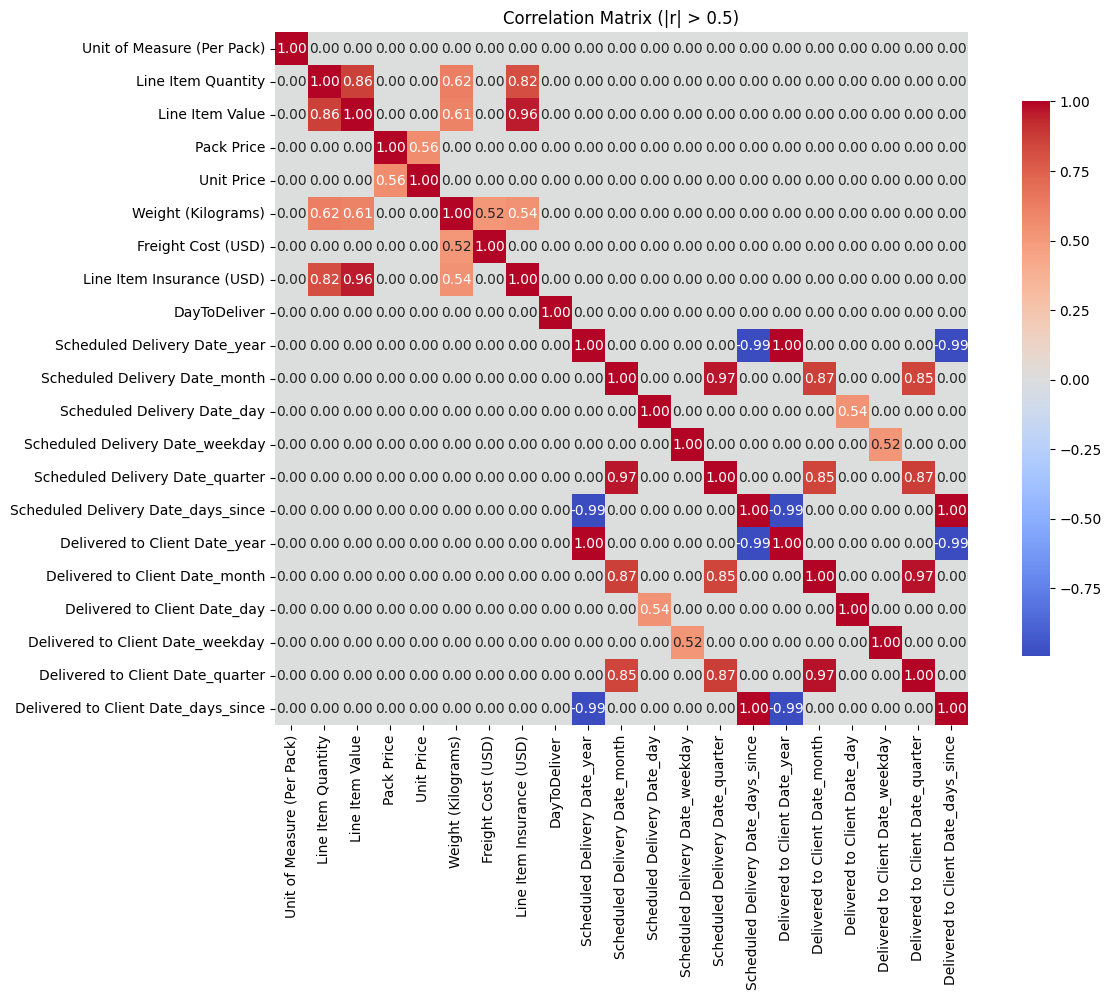

In [33]:
# Set a threshold (e.g., absolute correlation > 0.5)
target = 'Freight Cost (USD)'
threshold = 0.5

# Get numeric columns
numerical_columns = df.select_dtypes(include=['float', 'int']).columns
numerical_df = df[numerical_columns]

# Compute correlation matrix
correlation_matrix = numerical_df.corr()

# Apply threshold: mask values below abs(threshold)
filtered_corr = correlation_matrix.copy()
filtered_corr[(filtered_corr.abs() < threshold)] = 0

# Plot heatmap
plt.figure(figsize=(14, 9))
sns.heatmap(filtered_corr, annot=True, fmt=".2f", vmax=1.0, square=True, cmap="coolwarm", cbar_kws={"shrink": .8})
plt.title(f"Correlation Matrix (|r| > {threshold})")
plt.show()

In [34]:
# Compute correlation with the target only
correlations = numerical_df.corr()[target].drop(target)  # exclude self-correlation

# Separate features by threshold
low_corr_features = correlations[correlations.abs() < threshold].sort_values()
high_corr_features = correlations[correlations.abs() >= threshold].sort_values(ascending=False)

# Print the low correlation columns
print(f"🟡 Features with correlation < {threshold} (absolute) to '{target}':\n")
print(low_corr_features)

# Optional: print strong correlations too
print(f"\n🟢 Features with correlation ≥ {threshold} (absolute) to '{target}':\n")
print(high_corr_features)



🟡 Features with correlation < 0.5 (absolute) to 'Freight Cost (USD)':

Scheduled Delivery Date_days_since    -0.130443
Delivered to Client Date_days_since   -0.129796
Pack Price                            -0.091482
Unit of Measure (Per Pack)            -0.067820
Unit Price                            -0.045243
Delivered to Client Date_quarter      -0.034132
DayToDeliver                          -0.030786
Delivered to Client Date_month        -0.026811
Scheduled Delivery Date_month         -0.014394
Scheduled Delivery Date_quarter       -0.005543
Delivered to Client Date_day          -0.001809
Scheduled Delivery Date_weekday        0.003282
Delivered to Client Date_weekday       0.004807
Scheduled Delivery Date_day            0.033229
Scheduled Delivery Date_year           0.130206
Delivered to Client Date_year          0.131145
Line Item Insurance (USD)              0.301712
Line Item Value                        0.349611
Line Item Quantity                     0.371942
Name: Freight Cos

In [35]:
df.head()

,Project Code,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,...,Scheduled Delivery Date_weekofyear,Scheduled Delivery Date_days_since,Delivered to Client Date_year,Delivered to Client Date_month,Delivered to Client Date_day,Delivered to Client Date_weekday,Delivered to Client Date_is_weekend,Delivered to Client Date_quarter,Delivered to Client Date_weekofyear,Delivered to Client Date_days_since
1,108-VN-T01,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2006-11-14,2006-11-14,...,46,6816,2006,11,14,1,False,4,46,6816
3,108-VN-T01,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2006-09-01,2006-09-01,...,35,6890,2006,9,1,4,False,3,35,6890
4,108-VN-T01,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2006-08-11,2006-08-11,...,32,6911,2006,8,11,4,False,3,32,6911
5,112-NG-T01,Nigeria,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2006-09-28,2006-09-28,...,39,6863,2006,9,28,3,False,3,39,6863
6,110-ZM-T01,Zambia,PMO - US,Direct Drop,DDU,Air,Pre-PQ Process,Date Not Captured,2007-01-08,2007-01-08,...,2,6761,2007,1,8,0,False,1,2,6761


In [36]:
# Assuming df is your DataFrame
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical columns:")
for col in categorical_columns:
    print(f"\n🔹 {col} — Unique Values -{df[col].nunique()}")


Categorical columns:

🔹 Project Code — Unique Values -90

🔹 Country — Unique Values -34

🔹 Managed By — Unique Values -2

🔹 Fulfill Via — Unique Values -2

🔹 Vendor INCO Term — Unique Values -7

🔹 Shipment Mode — Unique Values -4

🔹 PQ First Sent to Client Date — Unique Values -581

🔹 PO Sent to Vendor Date — Unique Values -579

🔹 Product Group — Unique Values -3

🔹 Sub Classification — Unique Values -4

🔹 Vendor — Unique Values -42

🔹 Molecule/Test Type — Unique Values -42

🔹 Brand — Unique Values -25

🔹 Dosage — Unique Values -54

🔹 Dosage Form — Unique Values -15

🔹 Manufacturing Site — Unique Values -62

🔹 First Line Designation — Unique Values -2


In [37]:

# Datetime columns
datetime_columns = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()


print("\n Datetime columns:")
for col in datetime_columns:
    print(f"{col} — {df[col].nunique()} unique values")


 Datetime columns:
Scheduled Delivery Date — 1682 unique values
Delivered to Client Date — 1796 unique values
Delivery Recorded Date — 1729 unique values


In [38]:
# # Original datetime columns
# original_date_columns = [
#     'PQ First Sent to Client Date',
#     'PO Sent to Vendor Date',
#     'Scheduled Delivery Date',
#     'Delivery Recorded Date',
#     'Delivered to Client Date'
# ]

# # List of PO-related derived datetime columns
# po_date_columns = [
#     'PO Sent to Vendor Date_year',
#     'PO Sent to Vendor Date_month',
#     'PO Sent to Vendor Date_day',
#     'PO Sent to Vendor Date_weekday',
#     'PO Sent to Vendor Date_quarter',
#     'PO Sent to Vendor Date_weekofyear',
#     'PO Sent to Vendor Date_days_since'
# ]

# # Combine both sets of columns
# selected_columns = original_date_columns + po_date_columns

# # Filter only rows where any derived PO column is NaN
# filtered_rows = df[df[po_date_columns].isnull().any(axis=1)][selected_columns]

# # Show result
# print(f"📄 Rows with NaN in PO-derived columns (and original date fields): {len(filtered_rows)}")
# filtered_rows.head()


In [39]:
# Set how many top columns you want
N = 10  # Change this as needed

# Create a Series with number of unique values for each categorical column
unique_counts = df[categorical_columns].nunique().sort_values(ascending=False)

# Show top N
print(f"🔝 Top {N} categorical columns with the most unique values:\n")
print(unique_counts.head(N))


🔝 Top 10 categorical columns with the most unique values:

PQ First Sent to Client Date    581
PO Sent to Vendor Date          579
Project Code                     90
Manufacturing Site               62
Dosage                           54
Molecule/Test Type               42
Vendor                           42
Country                          34
Brand                            25
Dosage Form                      15
dtype: int64


In [40]:
# Drop unnecessary 
df = df.drop(['PQ First Sent to Client Date','PO Sent to Vendor Date','Scheduled Delivery Date','Delivery Recorded Date','Delivered to Client Date'], errors='ignore', axis=1)

In [41]:
from sklearn.preprocessing import LabelEncoder

# Copy the original DataFrame to preserve it
df_encoded = df.copy()

# List of selected columns for encoding
cols_to_encode = [
    'Project Code', 'Manufacturing Site', 'Dosage', 'Molecule/Test Type',
    'Vendor', 'Country', 'Brand'
]
# Apply Label Encoding to each categorical column
label_encoders = {}  # Store encoders if you need to inverse-transform later

for col in cols_to_encode:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))  # Ensure string type
    label_encoders[col] = le  # Save the encoder

# Assuming df is your DataFrame
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Columns left for one-hot encoding
one_hot_columns = [col for col in categorical_columns if col not in cols_to_encode]

# Apply one-hot encoding only to selected columns
df_one_hot = pd.get_dummies(df_encoded[one_hot_columns], drop_first=True)

# Drop original one-hot columns and concatenate encoded ones
df_combined = df_encoded.drop(columns=one_hot_columns).join(df_one_hot)

df_combined = df_combined.astype({col: int for col in df_combined.select_dtypes('bool').columns})


print("✅ Label encoding applied to:")
print(list(label_encoders))


✅ Label encoding applied to:
['Project Code', 'Manufacturing Site', 'Dosage', 'Molecule/Test Type', 'Vendor', 'Country', 'Brand']


In [42]:
df_combined.head()

,Project Code,Country,Vendor,Molecule/Test Type,Brand,Dosage,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,...,Dosage Form_Oral powder,Dosage Form_Oral solution,Dosage Form_Oral suspension,Dosage Form_Powder for oral solution,Dosage Form_Tablet,Dosage Form_Tablet - FDC,Dosage Form_Tablet - FDC + blister,Dosage Form_Tablet - FDC + co-blister,Dosage Form_Tablet - blister,First Line Designation_Yes
1,38,31,8,30,6,2,240,1000,6200.0,6.20,...,0,0,1,0,0,0,0,0,0,1
3,38,31,38,17,6,13,60,31920,127360.8,3.99,...,0,0,0,0,1,0,0,0,0,1
4,38,31,8,38,6,34,60,38000,121600.0,3.20,...,0,0,0,0,0,0,0,0,0,1
5,46,22,8,41,6,2,240,416,2225.6,5.35,...,0,1,0,0,0,0,0,0,0,1
6,42,32,26,11,15,19,90,135,4374.0,32.40,...,0,0,0,0,0,0,0,0,0,1


In [43]:
# Group by Vendor and Brand, fill with group mean
df_combined['Weight (Kilograms)'] = df_combined.groupby(['Vendor', 'Brand'])['Weight (Kilograms)'].transform(
    lambda x: x.fillna(x.mean())
)

In [44]:
df_combined['Weight (Kilograms)'] = df_combined.groupby('Line Item Quantity')['Weight (Kilograms)'].transform(
    lambda x: x.fillna(x.mean())
)

In [45]:
df_combined['Weight (Kilograms)'].fillna(df_combined['Weight (Kilograms)'].mean(), inplace=True)

In [46]:
# Bin weight into 20 quantile-based bins
df_combined['weight_bin'] = pd.qcut(df_combined['Weight (Kilograms)'], q=20, duplicates='drop')

# Fill Freight Cost based on binned weight
df_combined['Freight Cost (USD)'] = df_combined.groupby('weight_bin')['Freight Cost (USD)'].transform(
    lambda x: x.fillna(x.mean())
)

# Remove helper bin column
df_combined.drop('weight_bin', axis=1, inplace=True)


In [47]:
df_combined.isnull().sum()[df_combined.isnull().sum() > 0]

Series([], dtype: int64)

In [48]:
y = np.log1p(df_combined['Freight Cost (USD)'])  # log-transformed target
# y = df_combined['Freight Cost (USD)']  

In [63]:
X_raw = df_combined.drop(columns=['Freight Cost (USD)'], errors='ignore')

In [ ]:
X_raw.columns

Index(['Project Code', 'Country', 'Vendor', 'Molecule/Test Type', 'Brand',
       'Dosage', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'Weight (Kilograms)', 'Line Item Insurance (USD)', 'DayToDeliver',
       'Scheduled Delivery Date_year', 'Scheduled Delivery Date_month',
       'Scheduled Delivery Date_day', 'Scheduled Delivery Date_weekday',
       'Scheduled Delivery Date_is_weekend', 'Scheduled Delivery Date_quarter',
       'Scheduled Delivery Date_weekofyear',
       'Scheduled Delivery Date_days_since', 'Delivered to Client Date_year',
       'Delivered to Client Date_month', 'Delivered to Client Date_day',
       'Delivered to Client Date_weekday',
       'Delivered to Client Date_is_weekend',
       'Delivered to Client Date_quarter',
       'Delivered to Client Date_weekofyear',
       'Delivered to Client Date_days_since',
       'Managed By_South Africa Field Office', 'Fulfill Via_F

In [51]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [66]:
X = preprocessor.fit_transform(X_raw)

In [53]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((6623, 62), (1656, 62))

In [54]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [55]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 0.8],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestRegressor(), params, cv=3, scoring='neg_mean_absolute_error')
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)


Best Params: {'max_depth': None, 'max_features': 0.8, 'min_samples_split': 2, 'n_estimators': 200}


In [56]:
best_model = grid.best_estimator_

In [57]:
best_model 

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,0.8
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


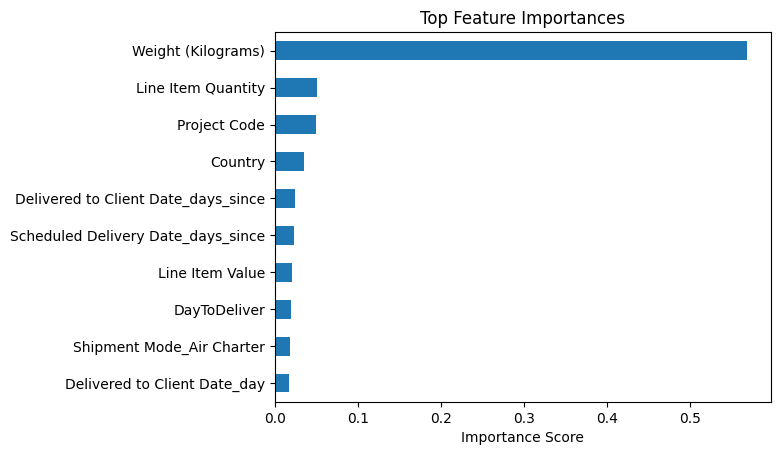

In [67]:
# Assuming `model` is a trained RandomForestRegressor or similar
importances = best_model.feature_importances_
feature_names = X_raw.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)


# Plot top N important features
top_n = 10
feat_imp.head(top_n).plot(kind='barh')
plt.title("Top Feature Importances")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()

In [71]:
feature_names = X_raw.columns

In [69]:
top_features = [
    "Weight (Kilograms)",
    "Line Item Quantity",
    "Project Code",
    "Country",
    "Delivered to Client Date_days_since",
    "Scheduled Delivery Date_days_since",
    "Line Item Value",
    "DayToDeliver",
    "Shipment Mode_Air Charter",
    "Delivered to Client Date_day"
]

In [72]:
# Convert X_train and X_test from arrays to DataFrames
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)


In [73]:
# Step 2: Now select only the top features
X_train_top = X_train_df[top_features]
X_test_top = X_test_df[top_features]

In [75]:

# Train a new model
model_reduced = RandomForestRegressor(**best_model.get_params())
model_reduced.fit(X_train_top, y_train)

# Predict and Evaluate
y_pred_train = np.expm1(model_reduced.predict(X_train_top))
y_pred_test = np.expm1(model_reduced.predict(X_test_top))
y_true_train = np.expm1(y_train)
y_true_test = np.expm1(y_test)

# Evaluation
def evaluate(y_true, y_pred, dataset=""):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f"\n📊 {dataset} Set:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R²: {r2:.4f}")
    print(f"MAPE: {mape:.2f}%")

evaluate(y_true_train, y_pred_train, "Training")
evaluate(y_true_test, y_pred_test, "Test")



📊 Training Set:
RMSE: 4026.30
MAE: 1302.60
R²: 0.9422
MAPE: 12.49%

📊 Test Set:
RMSE: 7241.54
MAE: 3088.64
R²: 0.8214
MAPE: 67.12%


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Reverse log1p transform to get predictions in original USD scale
y_train_pred_actual = np.expm1(y_train_pred)
y_test_pred_actual = np.expm1(y_test_pred)


# Reverse for true values too
y_train_actual = np.expm1(y_train)
y_test_actual = np.expm1(y_test)

# Metrics
def evaluate(y_true, y_pred, dataset_name=""):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"{dataset_name} Set Evaluation:")
    print(f"- RMSE: {rmse:.4f}")
    print(f"- MAE: {mae:.4f}")
    print(f"- R²: {r2:.4f}")
    print(f"- MAPE: {mape:.2f}%")
    print("-" * 40)

# # Evaluate both sets
# evaluate(y_train_actual, y_train_pred_actual, "Training")
# evaluate(y_test_actual, y_test_pred_actual, "Test")


# Direct evaluation without applying expm1()
evaluate(y_train, y_train_pred, "Training")
evaluate(y_test, y_test_pred, "Test")


Training Set Evaluation:
- RMSE: 20681.6614
- MAE: 12069.5849
- R²: -0.5163
- MAPE: 99.75%
----------------------------------------
Test Set Evaluation:
- RMSE: 21015.4828
- MAE: 12104.2746
- R²: -0.4963
- MAPE: 99.65%
----------------------------------------


In [ ]:
# import numpy as np

# # Check y_train_actual
# print("NaNs in y_train_actual:", np.isnan(y_train_actual).sum())
# print("Infs in y_train_actual:", np.isinf(y_train_actual).sum())

# # Check predictions
# print("NaNs in y_train_pred_actual:", np.isnan(y_train_pred_actual).sum())
# print("Infs in y_train_pred_actual:", np.isinf(y_train_pred_actual).sum())

NaNs in y_train_actual: 0
Infs in y_train_actual: 6414
NaNs in y_train_pred_actual: 0
Infs in y_train_pred_actual: 6568
